## Лабораторная работа № 4. Работа с matplotlib
### (Валяев Георгий, ПИ20-6)

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import seaborn as sns

##### 0. Загрузите датасет для предсказания цены квартиры в зависимости от ряда признаков.

In [24]:
dataframe = pd.read_csv('train.csv', sep=',', index_col=0)
dataframe

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580


##### 1. Постройте круговую диаграмму для признака `Rooms`, иллюстрирующую количество квартир в процентах в зависимости от количества комнат. Сделайте сектор с наибольшим числом квартир выдвинутым.

In [3]:
count = dataframe["Rooms"].value_counts()
rooms = [f"{str(i).split('.')[0]}-комнатных - {count[i]}" for i in count.index]
rooms

['2-комнатных - 3880',
 '1-комнатных - 3705',
 '3-комнатных - 2235',
 '4-комнатных - 150',
 '5-комнатных - 18',
 '0-комнатных - 8',
 '10-комнатных - 2',
 '19-комнатных - 1',
 '6-комнатных - 1']

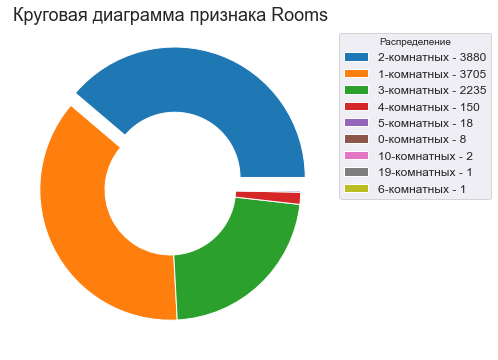

In [5]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
plt.title('Круговая диаграмма признака Rooms', fontsize=18)
plt.pie(count, explode=[0.1] + [0]*(len(rooms) - 1), textprops={'fontsize': 14}, wedgeprops={'width': 0.5})
plt.legend(labels=rooms, title ="Распределение", bbox_to_anchor=(1,1), fontsize=12)
plt.show()

##### 2. Постройте гистограмму целевой переменной `Price`. Оцените визуально, по какой цене продаётся наибольшее количество квартир.

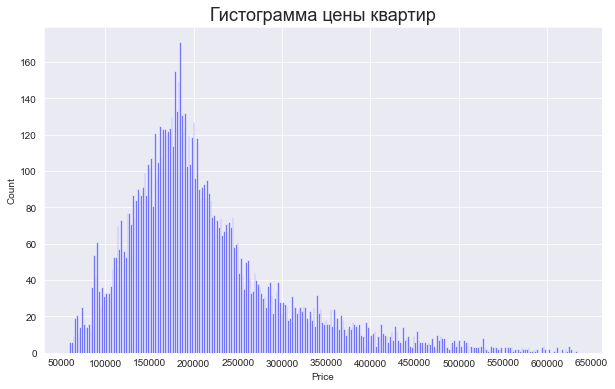

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Гистограмма цены квартир', fontsize=18)
ax.hist(dataframe['Price'], 300, color='blue', alpha=0.5)
ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
ax.xaxis.set_minor_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

##### 3. Постройте диаграммы рассеяния для признаков `Rooms`, `Square`, `HouseFloor`, `HouseYear` в зависимости от целевой переменной `Price` в одной области fiagure(). Оцените визуально, есть ли среди них такие, на которых разброс точек близок к линейной функции.

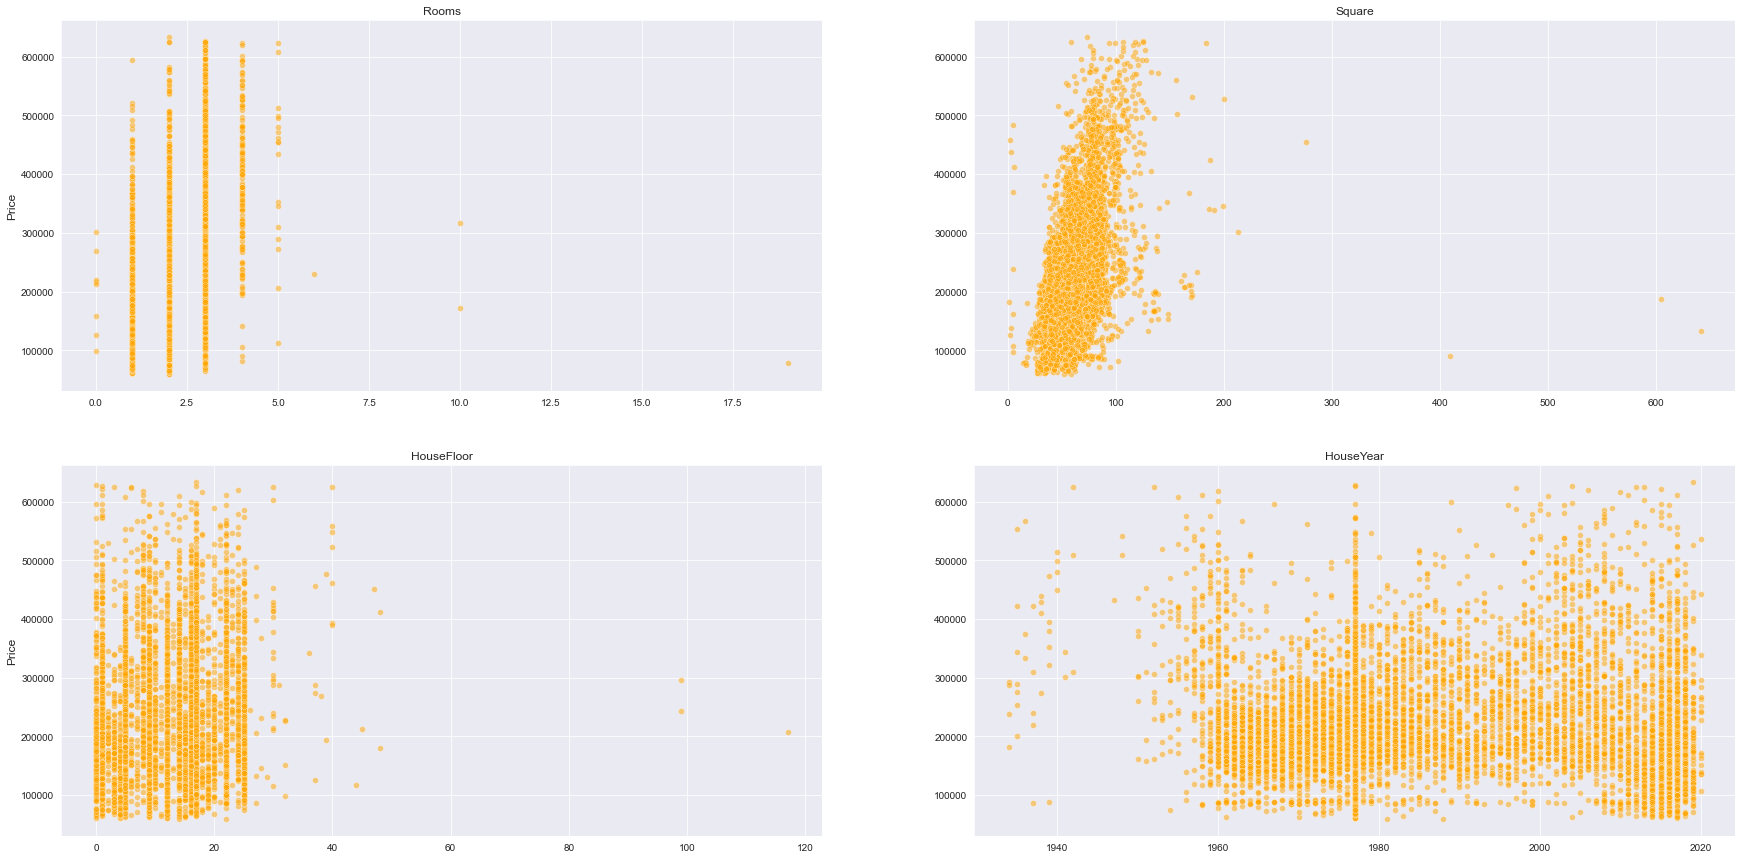

In [29]:
copy_dataframe = dataframe.copy()
q1, q3 = copy_dataframe['HouseYear'].quantile(q=0.25), copy_dataframe['HouseYear'].quantile(q=0.75)
iqr = q3 - q1

maska = (copy_dataframe['HouseYear'] < (q1 - 1.5*iqr)) | (copy_dataframe['HouseYear'] > (q3 + 1.5*iqr))

copy_dataframe.drop(index=copy_dataframe[maska].index, inplace=True)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30, 15))
columns_data = ["Rooms","Square","HouseFloor","HouseYear"]

for ind, ax in enumerate(fig.axes):
    ax.scatter(x=copy_dataframe[columns_data[ind]], y=copy_dataframe["Price"], color='orange', edgecolors='white', linewidths=0.5, alpha=0.5)
    ax.grid(True)
    ax.set_title(columns_data[ind])
    if ind % 2 == 0:
        ax.set_ylabel("Price", fontsize=12)

plt.show()

##### 4. Постройте ядерную оценку плотности целевой переменной `Price`. Оцените визуально, напоминает ли полученный график нормальное распределение. Постройте двумерную ядерную оценку плотности для целевой переменной `Price` и признака `HouseFloor`, затем оцените визуально на каких этажах и по какой цене продаётся основная масса квартир.

<AxesSubplot:xlabel='Price', ylabel='Density'>

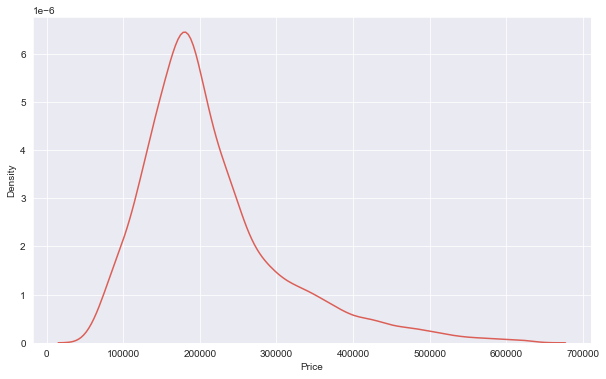

In [38]:
sns.kdeplot(x=dataframe['Price'], ax=plt.subplots()[1])

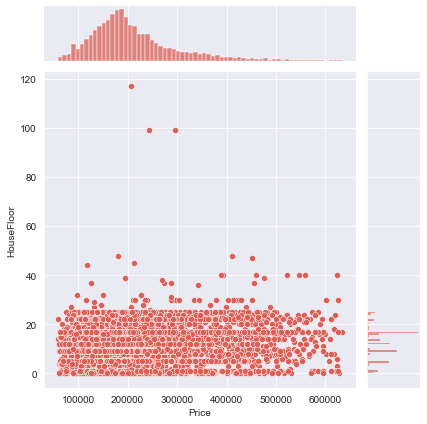

In [40]:
sns.jointplot(x=dataframe['Price'], y=dataframe['HouseFloor'], data=dataframe[["Price", "HouseFloor"]])

##### 5. Постройте ящиковую диаграмму признака `Square`. Оцените визуально имеются ли выбросы, и, если да, то начиная с какого размера площади значение признака можно считать выбросом.

Верхняя нормальная граница: 102.08924188493728
Нижняя нормальная граница: 5.586264180189367


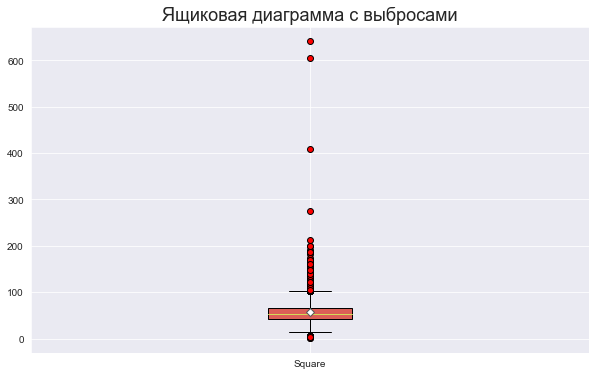

In [45]:
q1, q3 = dataframe["Square"].quantile(q=0.25), dataframe["Square"].quantile(q=0.75)
iqr = q3 - q1
upper = (q3 + 1.5*iqr)
lower = (q1 - 1.5*iqr)
print("Верхняя нормальная граница:",upper)
print("Нижняя нормальная граница:",lower)

fig, axes = plt.subplots(figsize=(10, 6))
plt.title("Ящиковая диаграмма с выбросами", fontsize=18)
plt.boxplot(dataframe['Square'], labels=["Square"], patch_artist=True, showmeans=True,
    flierprops={'markerfacecolor': 'red', 'marker': 'o'},
    meanprops={'markerfacecolor': '#fff', 'marker': 'D', 'markeredgecolor': '#555'})

plt.grid(True)
plt.show()

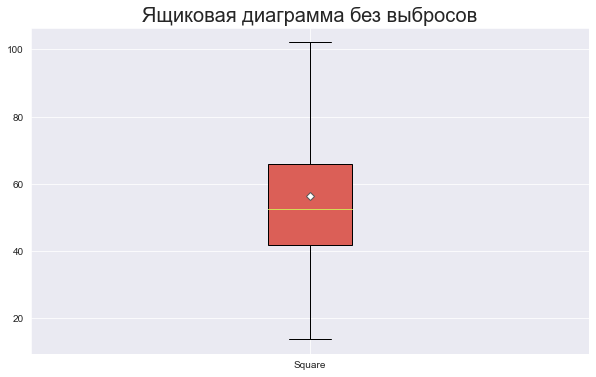

In [46]:
fig, axes = plt.subplots(figsize=(10, 6))
plt.title("Ящиковая диаграмма без выбросов", fontsize=20)

plt.boxplot(dataframe['Square'], labels=["Square"], patch_artist=True, showfliers=False,
    showmeans=True, meanprops={'markerfacecolor': '#fff', 'marker': 'D', 'markeredgecolor': '#555'})

plt.grid(True)

plt.show()

##### 6. При помощи сетки графиков `PairGrid` визуализируйте попарные отношения признаков `Rooms`, `Square`, `HouseFloor`, `HouseYear`, `Price` следующим образом: на диагонали - гистограммы, под диагональю - ядерные оценки плотности, над диагональю - диаграммы рассеяния. По результатам визуализации сделайте выводы (аналогичные п.2,3,4).

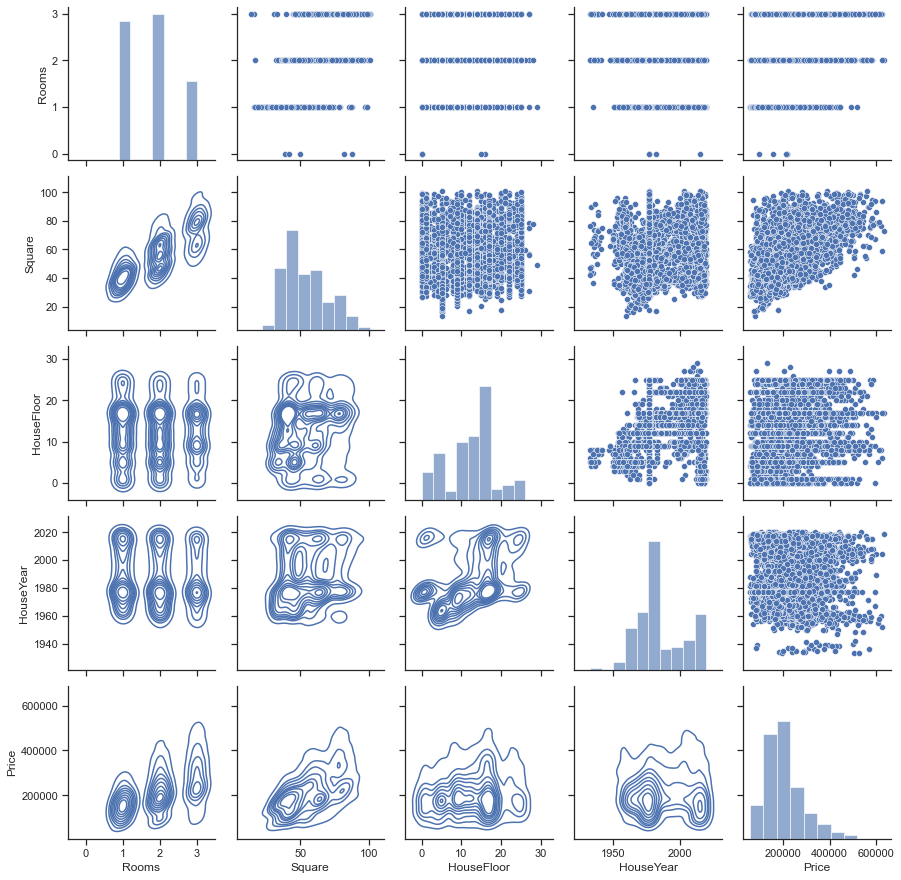

In [48]:
second_copy_dataframe = dataframe.copy()
columns_data = ["Rooms","Square","HouseFloor","HouseYear"]

for column in columns_data:
    q1, q3 = second_copy_dataframe[column].quantile(q=0.25), second_copy_dataframe[column].quantile(q=0.75)
    iqr = q3 - q1
    maska = (second_copy_dataframe[column] < (q1 - 1.5*iqr)) | (second_copy_dataframe[column] > (q3 + 1.5*iqr))
    second_copy_dataframe.drop(second_copy_dataframe[maska].index, inplace=True)

sns.set(style="ticks")
final = sns.PairGrid(data=second_copy_dataframe[columns_data + ["Price"]])
final.map_upper(sns.scatterplot)
final.map_diag(plt.hist, alpha=0.6)
final.map_lower(sns.kdeplot)

##### 7. Постройте тепловую карту матрицы корреляции (`df.corr()`) признаков `Rooms`, `Square`, `HouseFloor`, `HouseYear`, `Price`. По ней определите, какие признаки являются зависимыми (у таких признаков коэффициент корреляции близок к единице).

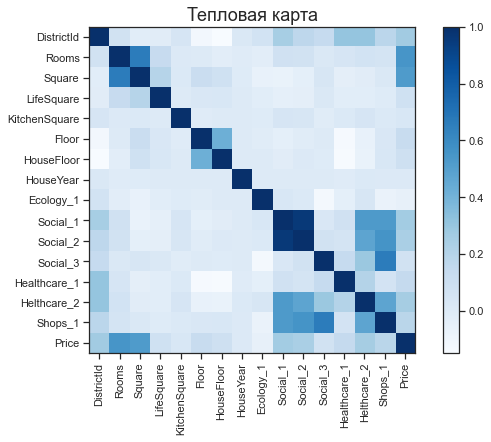

In [49]:
matr = dataframe.corr()

plt.title("Тепловая карта", fontsize=18)
plt.xticks(ticks=range(len(matr.columns)), labels=matr.columns, rotation=90)
plt.yticks(ticks=range(len(matr.index)), labels=matr.index)

plt.colorbar(plt.imshow(matr, cmap="Blues", interpolation='nearest'))
plt.show()